In [1]:
# Import modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
# Import data
train = pd.read_csv('../data/train.csv', index_col=0)

# Filter out commercial properties
MSZoningMask = (train.MSZoning=='A') | (train.MSZoning=='C') | (train.MSZoning=='I') | (train.MSZoning=='C (all)')
train = train[~MSZoningMask]

# Drop NAs
train = train.fillna(value=0)

# Convert ordinals into numbers 
ord_list = ['KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 
 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
'PoolQC', 'GarageType', 'Street', 'LandContour', 'Utilities', 
'SaleType', 'PavedDrive', 'GarageFinish', 'Functional', 'SaleCondition',
'Electrical', 'CentralAir', 'Heating', 'BsmtExposure', 'Foundation',
'MasVnrType', 'LandSlope', 'RoofMatl', 'Alley']

for item in ord_list:

    train[item] = train[item].astype('category')
    cat_columns = train.select_dtypes(['category']).columns
    train[cat_columns] = train[cat_columns].apply(lambda x: x.cat.codes)
    
# Create flag for irregular lot shape
train['LotShape'] = [1 if x == 'Reg' else 0 for x in train['LotShape']]

# # Dummify Neighborhood
dummies = pd.get_dummies(train['Neighborhood']).rename(columns=lambda x: 'Nhood_' + str(x))
train = pd.concat([train, dummies], axis=1)

# Drop vars

drop_list = ['MSSubClass', 'MSZoning', 'BsmtFinType1', 'BsmtFinType2',
            'BldgType','HouseStyle', 'Condition1', 'Condition2',
            'Neighborhood', 'LotConfig', 'RoofStyle', 'MoSold', 'YrSold',
            'Exterior1st', 'Exterior2nd', 'Fence', 'MiscFeature']
train = train.drop(drop_list, axis=1)

# Convert years to ages
train['YearBuilt'] = 2019 - train['YearBuilt']
train['YearRemodAdd'] = 2019 - train['YearRemodAdd']
train['GarageYrBlt'] = 2019 - train['GarageYrBlt']

In [6]:
# Separate price and drop
train_price = train['SalePrice']
train = train.drop('SalePrice', axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0, 0.5, '$R^2$')

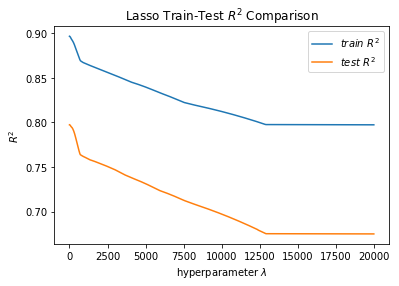

In [7]:
# Woo doggies
from sklearn.linear_model import Lasso

train_x = train[0:700]
test_x = train[700:1400]

# Split the targets into training/testing sets
train_y = train_price[0:700]
test_y = train_price[700:1400]

# create a ridge regression instance
lasso = Lasso()

lasso_scores_train = []
lasso_scores_test = []
coefs_lasso  = []
intercepts_lasso = []

alphas = np.linspace(0, 20000, 1000)

for alpha in alphas:
    lasso.set_params(alpha=alpha,normalize=False)
    lasso.fit(train_x, train_y)
    lasso_scores_train.append(lasso.score(train_x, train_y))
    lasso_scores_test.append(lasso.score(test_x, test_y))
    coefs_lasso.append(lasso.coef_)
    intercepts_lasso.append(lasso.intercept_)

    
lasso_scores_train = np.array(lasso_scores_train)
lasso_scores_test = np.array(lasso_scores_test)

plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Lasso Train-Test $R^2$ Comparison')

plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

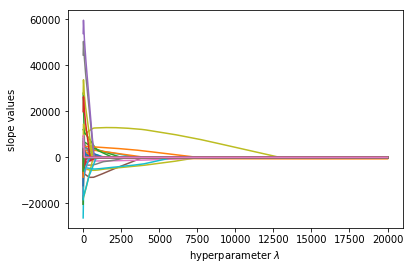

In [8]:
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = train_x.columns)  

for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.show()


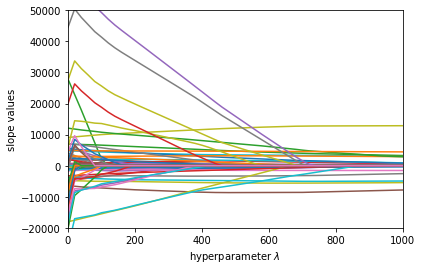

In [9]:
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = train_x.columns)  

for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

plt.xlim(0, 1000)
plt.ylim(-20000, 50000)

plt.show()


In [ ]:
# Wow, model doesn't converge, we must not have overfit, lol

In [10]:
# Import data
test = pd.read_csv('../data/test.csv', index_col=0)

# Drop NAs
test = test.fillna(value=0)

# Convert ordinals into numbers 
ord_list = ['KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 
 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
'PoolQC', 'GarageType', 'Street', 'LandContour', 'Utilities', 
'SaleType', 'PavedDrive', 'GarageFinish', 'Functional', 'SaleCondition',
'Electrical', 'CentralAir', 'Heating', 'BsmtExposure', 'Foundation',
'MasVnrType', 'LandSlope', 'RoofMatl', 'Alley']

for item in ord_list:

    test[item] = test[item].astype('category')
    cat_columns = test.select_dtypes(['category']).columns
    test[cat_columns] = test[cat_columns].apply(lambda x: x.cat.codes)
    
# Create flag for irregular lot shape
test['LotShape'] = [1 if x == 'Reg' else 0 for x in test['LotShape']]

# # Dummify Neighborhood
dummies = pd.get_dummies(test['Neighborhood']).rename(columns=lambda x: 'Nhood_' + str(x))
test = pd.concat([test, dummies], axis=1)

# Drop vars

drop_list = ['MSSubClass', 'MSZoning', 'BsmtFinType1', 'BsmtFinType2',
            'BldgType','HouseStyle', 'Condition1', 'Condition2',
            'Neighborhood', 'LotConfig', 'RoofStyle', 'MoSold', 'YrSold',
            'Exterior1st', 'Exterior2nd', 'Fence', 'MiscFeature']
test = test.drop(drop_list, axis=1)

# Convert years to ages
test['YearBuilt'] = 2019 - test['YearBuilt']
test['YearRemodAdd'] = 2019 - test['YearRemodAdd']
test['GarageYrBlt'] = 2019 - test['GarageYrBlt']


In [11]:
test['SalePrice'] = lasso.predict(test)


In [13]:
test['SalePrice'].mean()

179016.45312345325

In [15]:
train_price.mean()

181654.94206896552

In [ ]:
#ROFL